In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [8]:
def load_dataset():
    """
    Charger un dataset depuis Google Colab via upload.
    Supporte CSV, Excel, JSON.
    """
    from google.colab import files
    import pandas as pd
    import io

    print("Veuillez importer votre fichier dataset (.csv, .xlsx, .xls, .json)")
    uploaded = files.upload()

    if not uploaded:
        print("Aucun fichier importé !")
        return None, None

    file_name = list(uploaded.keys())[0]
    file_data = uploaded[file_name]

    print(f"Fichier importé : {file_name}")

    try:
        if file_name.endswith('.csv'):
            df = pd.read_csv(io.BytesIO(file_data))

        elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            df = pd.read_excel(io.BytesIO(file_data))

        elif file_name.endswith('.json'):
            df = pd.read_json(io.BytesIO(file_data))

        else:
            raise ValueError("Format non supporté : utilisez CSV, XLSX, XLS, ou JSON")

        print(f"Dataset chargé avec succès !")
        print(f"Shape : {df.shape}")
        print(f"Colonnes : {list(df.columns)}")

        return df, file_name

    except Exception as e:
        print(f"Erreur lors du chargement : {str(e)}")
        return None, None


In [10]:
def data_understanding(df):
    """
    Analyse exploratoire des données
    """
    print("="*50)
    print("DATA UNDERSTANDING")
    print("="*50)

    # Affichage des premières lignes
    print("\n1. PREMIÈRES LIGNES DU DATASET:")
    print(df.head())

    # Shape du dataset
    print(f"\n2. SHAPE DU DATASET: {df.shape}")

    # Informations générales
    print("\n3. INFORMATIONS GÉNÉRALES:")
    df.info()

    # Statistiques descriptives
    print("\n4. STATISTIQUES DESCRIPTIVES:")
    print(df.describe(include='all'))

    # Valeurs manquantes
    print("\n5. VALEURS MANQUANTES:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Valeurs_manquantes': missing_data,
        'Pourcentage': missing_percent
    })
    print(missing_df[missing_df['Valeurs_manquantes'] > 0])

    # Types de données
    print("\n6. TYPES DE DONNÉES:")
    print(df.dtypes.value_counts())

In [11]:
def plot_correlations(df):
    """
    Visualisation des corrélations entre variables numériques
    """
    print("\n" + "="*50)
    print("ANALYSE DES CORRÉLATIONS")
    print("="*50)

    # Sélection des colonnes numériques
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) > 1:
        # Matrice de corrélation
        plt.figure(figsize=(12, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Matrice de Corrélation entre Variables Numériques')
        plt.tight_layout()
        plt.show()

        # Pairplot pour les corrélations (limité aux premières colonnes pour éviter la surcharge)
        if len(numeric_cols) <= 8:
            plt.figure(figsize=(15, 10))
            sns.pairplot(df[numeric_cols[:8]])
            plt.suptitle('Pairplot des Variables Numériques', y=1.02)
            plt.show()
    else:
        print("Pas assez de variables numériques pour l'analyse de corrélation")


In [12]:
def detect_outliers(df):
    """
    Détection et visualisation des valeurs aberrantes
    """
    print("\n" + "="*50)
    print("DÉTECTION DES VALEURS ABERRANTES")
    print("="*50)

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) > 0:
        # Boxplots pour chaque variable numérique
        n_cols = min(4, len(numeric_cols))
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

        for i, col in enumerate(numeric_cols):
            if i < len(axes):
                df.boxplot(column=col, ax=axes[i])
                axes[i].set_title(f'Boxplot de {col}')

        # Masquer les axes vides
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        # Détection quantitative des outliers (méthode IQR)
        print("\nDÉTECTION QUANTITATIVE DES OUTLIERS (méthode IQR):")
        outliers_summary = []

        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_percent = (outlier_count / len(df)) * 100

            outliers_summary.append({
                'Variable': col,
                'Outliers': outlier_count,
                'Pourcentage': f"{outlier_percent:.2f}%",
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })

        outliers_df = pd.DataFrame(outliers_summary)
        print(outliers_df)

    else:
        print("Aucune variable numérique trouvée pour la détection d'outliers")


Veuillez importer votre fichier dataset (.csv, .xlsx, .xls, .json)


Saving wineQualityReds.csv to wineQualityReds (3).csv
Fichier importé : wineQualityReds (3).csv
Dataset chargé avec succès !
Shape : (1599, 13)
Colonnes : ['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
DATA UNDERSTANDING

1. PREMIÈRES LIGNES DU DATASET:
   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978

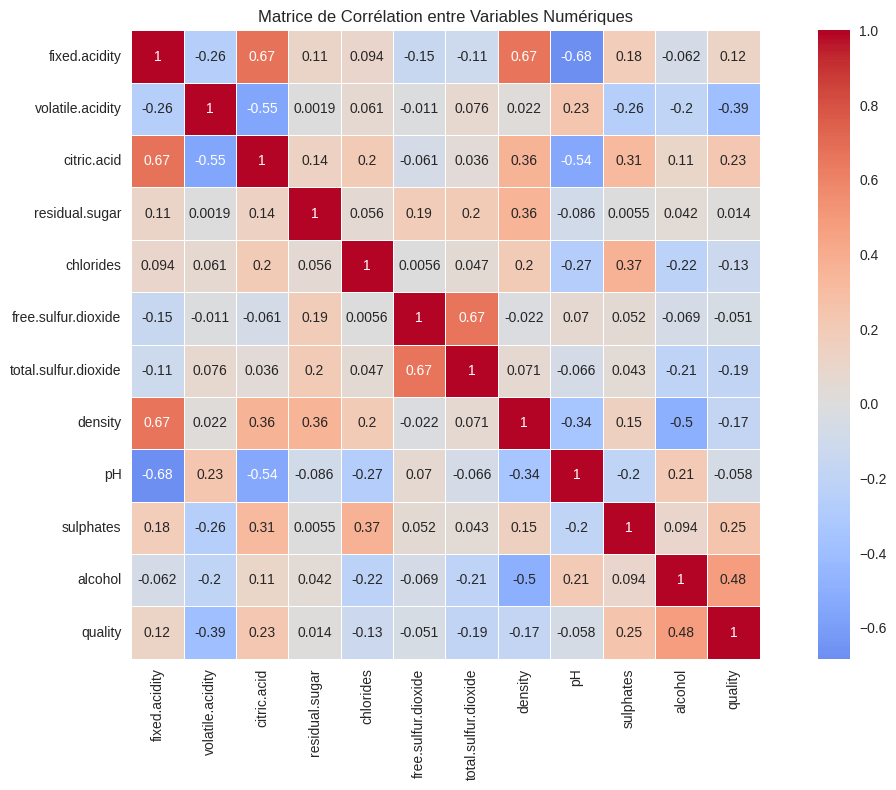


DÉTECTION DES VALEURS ABERRANTES


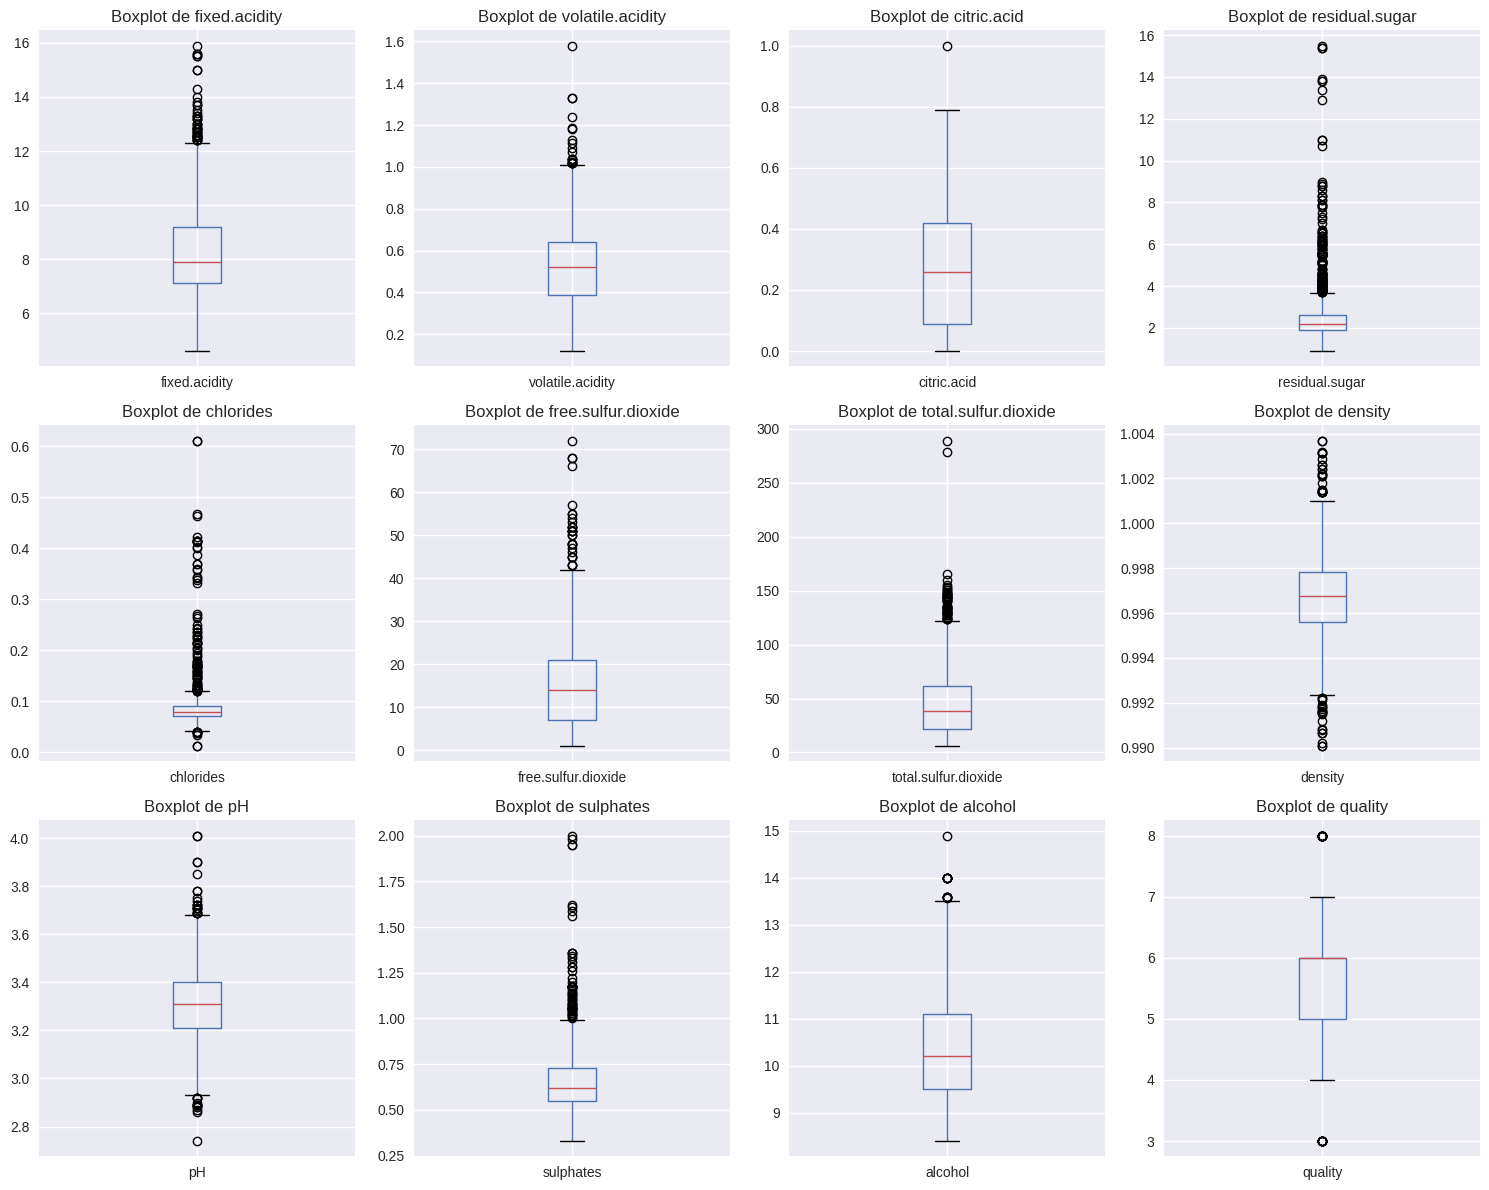


DÉTECTION QUANTITATIVE DES OUTLIERS (méthode IQR):
                Variable  Outliers Pourcentage  Lower_Bound  Upper_Bound
0          fixed.acidity        49       3.06%     3.950000    12.350000
1       volatile.acidity        19       1.19%     0.015000     1.015000
2            citric.acid         1       0.06%    -0.405000     0.915000
3         residual.sugar       155       9.69%     0.850000     3.650000
4              chlorides       112       7.00%     0.040000     0.120000
5    free.sulfur.dioxide        30       1.88%   -14.000000    42.000000
6   total.sulfur.dioxide        55       3.44%   -38.000000   122.000000
7                density        45       2.81%     0.992248     1.001187
8                     pH        35       2.19%     2.925000     3.685000
9              sulphates        59       3.69%     0.280000     1.000000
10               alcohol        13       0.81%     7.100000    13.500000
11               quality        28       1.75%     3.500000     7.500000

In [19]:
def main():
    """
    Fonction principale exécutant tout le pipeline
    """
    try:
        # Chargement du dataset
        df, file_path = load_dataset()
        df = df.drop(columns=["Unnamed: 0"])

        # Data Understanding
        data_understanding(df)

        # Analyse des corrélations
        plot_correlations(df)

        # Détection des outliers
        detect_outliers(df)




        # Sauvegarde du dataset transformé
        save_option = input("\nVoulez-vous sauvegarder le dataset transformé? (o/n): ")
        if save_option.lower() == 'o':
            if file_path.endswith('.csv'):
                output_path = file_path.replace('.csv', '_transformed.csv')
                df.to_csv(output_path, index=False)
            elif file_path.endswith('.xlsx'):
                output_path = file_path.replace('.xlsx', '_transformed.csv')
                df.to_csv(output_path, index=False)
            else:
                output_path = file_path + '_transformed.csv'
                df.to_csv(output_path, index=False)
            print(f"Dataset sauvegardé sous: {output_path}")

    except Exception as e:
        print(f"Une erreur est survenue: {str(e)}")

# Exécution du script
if __name__ == "__main__":
    main()

In [20]:
df = pd.read_csv("wineQualityReds (3)_transformed.csv")
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
y = df["quality"]            # cible
X = df.drop(columns=["quality"])  # variables explicatives

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:


def generate_random_linear_features(X, k=50):
    """
    RLT naive : crée k nouvelles features = combinaisons linéaires aléatoires
    """
    n_samples, n_features = X.shape
    rng = np.random.RandomState(42)

    new_features = {}
    for i in range(k):
        w = rng.randn(n_features)         # poids aléatoires
        f = np.dot(X.values, w)           # combinaison linéaire
        new_features[f"RLT_{i}"] = f

    return pd.DataFrame(new_features, index=X.index)


In [27]:
# Réindexer pour être sûr
X_train2 = X_train.reset_index(drop=True)
X_test2  = X_test.reset_index(drop=True)

# Génération RLT
RLT_train = generate_random_linear_features(X_train2)
RLT_test  = generate_random_linear_features(X_test2)

# Concat correct
X_train_RLT = pd.concat([X_train2, RLT_train], axis=1)
X_test_RLT  = pd.concat([X_test2, RLT_test], axis=1)


In [28]:
print("X_train_RLT:", X_train_RLT.shape)
print("y_train:", y_train.shape)


X_train_RLT: (1279, 61)
y_train: (1279,)


In [29]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_RLT, y_train)


ExtraTreesClassifier(n_estimators=200, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_RLT)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy RLT Naive + ExtraTrees = {acc:.4f}")


Accuracy RLT Naive + ExtraTrees = 0.6469


In [31]:
model_vi = ExtraTreesClassifier()
model_vi.fit(X, y)
importances = model_vi.feature_importances_


In [32]:
threshold = np.quantile(importances, 0.5)
important_vars = X.columns[importances >= threshold]
less_important_vars = X.columns[importances < threshold]


In [33]:
X_muted = X.copy()
for col in less_important_vars:
    X_muted[col] = np.random.normal(0, 1, size=len(X))


In [42]:
clf = ExtraTreesClassifier()
scores = cross_val_score(clf, X_muted, y, cv=5)
accuracy = scores.mean()
print(f"Accuracy RLT Avec Muting + ExtraTrees = {accuracy:.4f}")


Accuracy RLT Avec Muting + ExtraTrees = 0.5829


In [43]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

# Charger le dataset
df = pd.read_csv("wineQualityReds (3)_transformed.csv")
X = df.drop("quality", axis=1)
y = df["quality"]

# Calcul des corrélations avec la target
correlations = X.corrwith(y).abs().sort_values(ascending=False)
strong_vars = list(correlations.index)

# Fonction pour RLT étape
def RLT_strong_features(X, strong_vars, n):
    """Retourne un sous-ensemble de X avec les n variables les plus fortes"""
    selected = strong_vars[:n]
    return X[selected]

# Tester RLT1 → RLT5
for n in range(1,6):
    X_rlt = RLT_strong_features(X, strong_vars, n)
    clf = ExtraTreesClassifier(n_estimators=200, random_state=42)
    scores = cross_val_score(clf, X_rlt, y, cv=5)
    print(f"Accuracy RLT{n} + ExtraTrees =", round(scores.mean(),4))


Accuracy RLT1 + ExtraTrees = 0.5259
Accuracy RLT2 + ExtraTrees = 0.4859
Accuracy RLT3 + ExtraTrees = 0.5228
Accuracy RLT4 + ExtraTrees = 0.5278
Accuracy RLT5 + ExtraTrees = 0.5673
